C:\Users\20192167\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


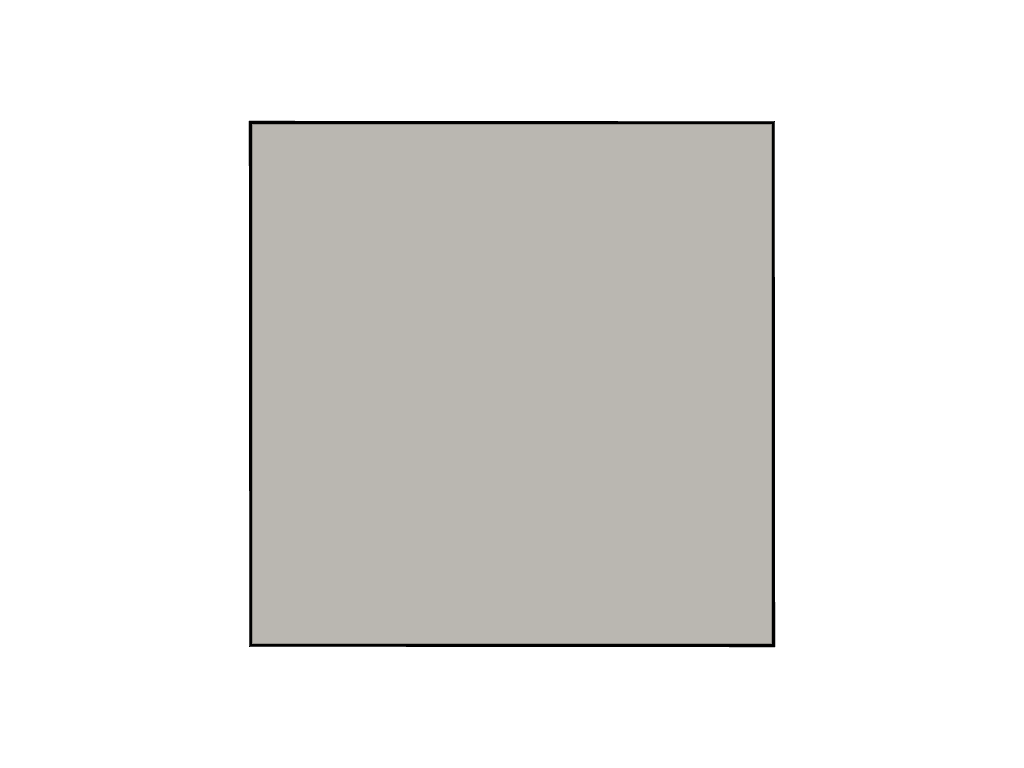

In [1]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                  [1,0,0],
                  [1,1,0],
                  [0,1,0],
                [0.5, 0.5, 0]])

cells =  np.array([[4, 0, 1, 2, 3]])  

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [2]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 1.0
The minimum Aspect Ratio of the mesh is 1.0
the maximum Aspect Ratio of the mesh is 1.0


In [3]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

The average Skewness of the mesh is 0.0
The minimum Skewness of the mesh is 0.0
the maximum Skewness of the mesh is 0.0


In [4]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the mesh is', round(max(Orthogonality),3)) 

The average Face Orthogonality of the mesh is 1.0
The minimum Face Orthogonality of the mesh is 1.0
the maximum Face Orthogonality of the mesh is 1.0


C:\Users\20192167\AppData\Local\Temp/ipykernel_24844/843334755.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ort = (dot_e_A)/(magnitude_e*magnitude_A)


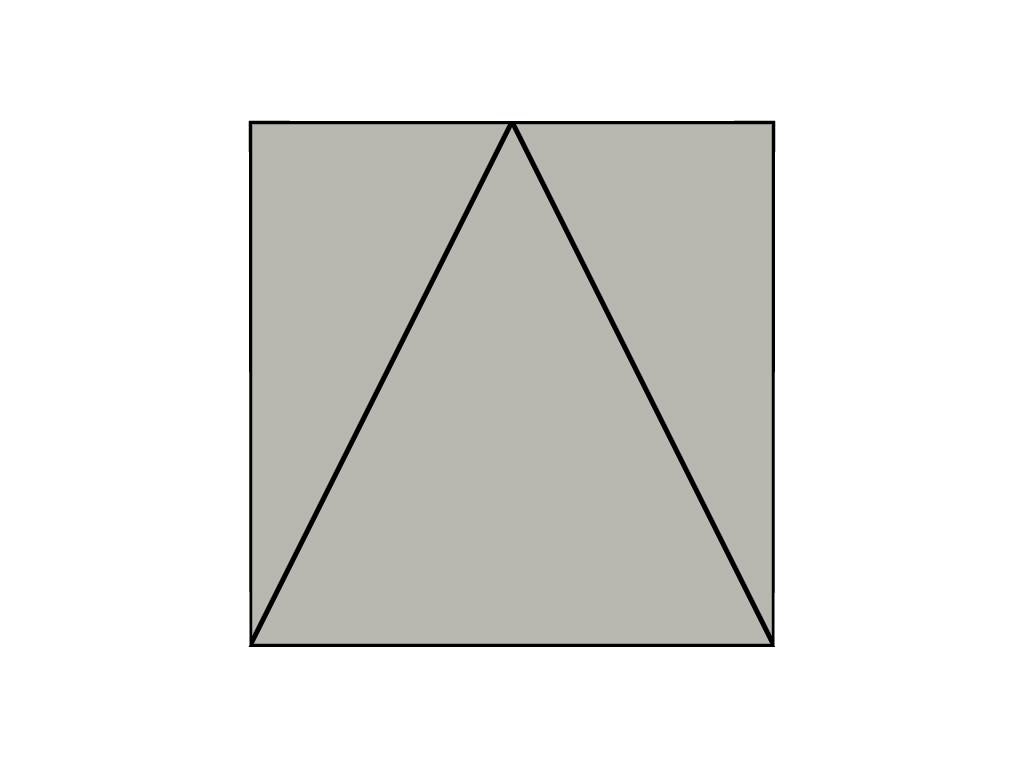

In [5]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                  [1,0,0],
                  [1,1,0],
                  [0,1,0],
                  [0.5,1,0]])

cells =  np.array([[3, 0, 4, 3],
                   [3,0,1,4],
                   [3,1,2,4]])  

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [6]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 0.596
The minimum Aspect Ratio of the mesh is 0.447
the maximum Aspect Ratio of the mesh is 0.894


In [7]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

The average Skewness of the mesh is 0.41
The minimum Skewness of the mesh is 0.114
the maximum Skewness of the mesh is 0.557


In [8]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the mesh is', round(max(Orthogonality),3)) 

The average Face Orthogonality of the mesh is 0.802
The minimum Face Orthogonality of the mesh is 0.707
the maximum Face Orthogonality of the mesh is 0.992


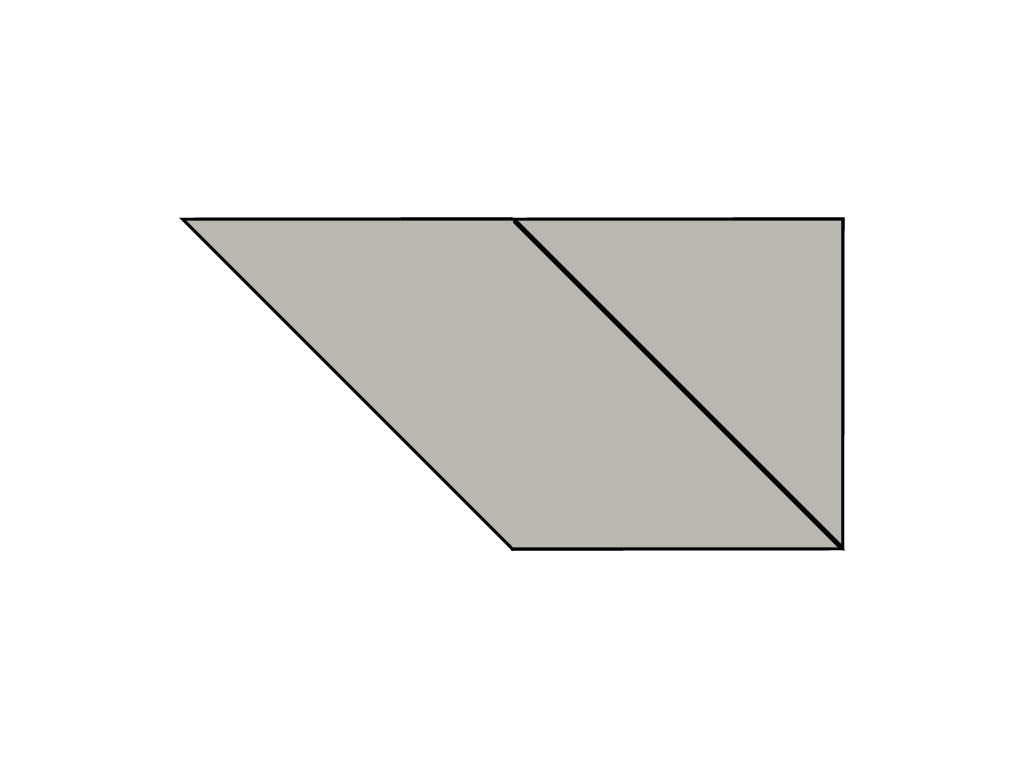

In [9]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                  [1,0,0],
                  [1,1,0],
                  [0,1,0],
                  [-1,1,0],
                  [0.05,0.05,0]])

cells =  np.array([[4, 0, 1, 3, 4,3,1,2,3]])  

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [10]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 0.707
The minimum Aspect Ratio of the mesh is 0.707
the maximum Aspect Ratio of the mesh is 0.707


In [11]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

The average Skewness of the mesh is 0.5
The minimum Skewness of the mesh is 0.5
the maximum Skewness of the mesh is 0.5


In [12]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the mesh is', round(max(Orthogonality),3)) 

The average Face Orthogonality of the mesh is 0.707
The minimum Face Orthogonality of the mesh is 0.707
the maximum Face Orthogonality of the mesh is 0.707


C:\Users\20192167\AppData\Local\Temp/ipykernel_24844/843334755.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ort = (dot_e_A)/(magnitude_e*magnitude_A)


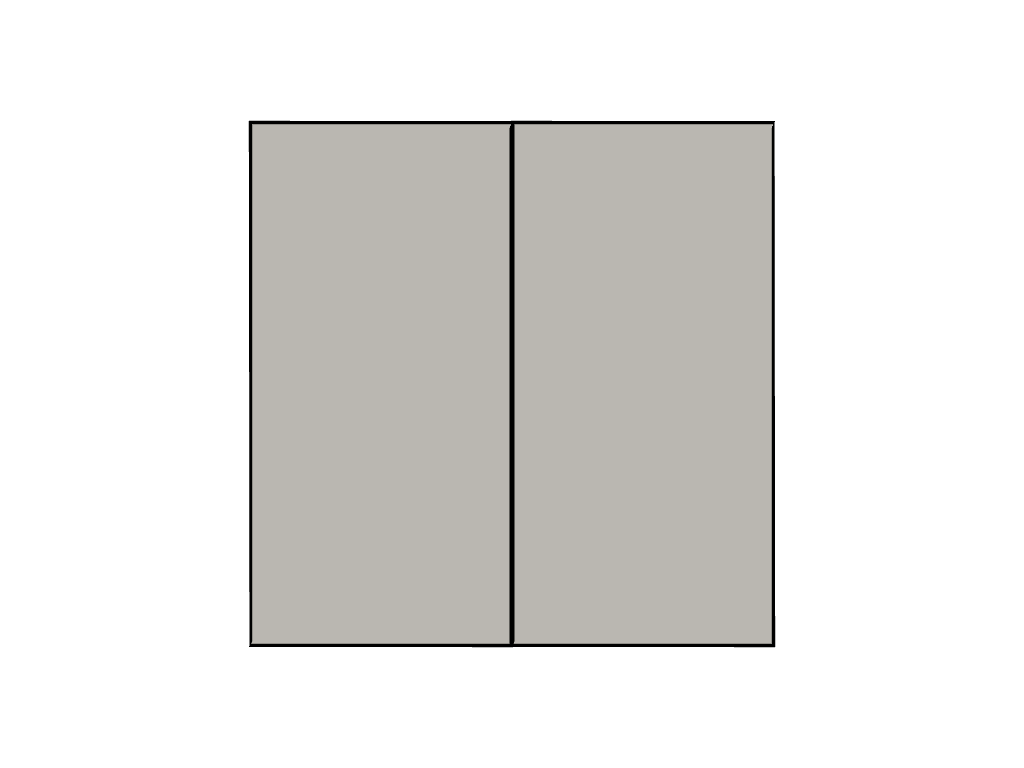

In [13]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                  [1,0,0],
                  [1,1,0],
                  [0,1,0],
                  [0.5,0,0],
                  [0.5,1,0]])

cells =  np.array([[4, 0, 4, 5, 3],
                   [4, 4, 1, 2, 5]])  

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [14]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 0.5
The minimum Aspect Ratio of the mesh is 0.5
the maximum Aspect Ratio of the mesh is 0.5


In [15]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

The average Skewness of the mesh is 0.0
The minimum Skewness of the mesh is 0.0
the maximum Skewness of the mesh is 0.0


In [16]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the mesh is', round(max(Orthogonality),3)) 

The average Face Orthogonality of the mesh is 1.0
The minimum Face Orthogonality of the mesh is 1.0
the maximum Face Orthogonality of the mesh is 1.0


C:\Users\20192167\AppData\Local\Temp/ipykernel_24844/843334755.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ort = (dot_e_A)/(magnitude_e*magnitude_A)


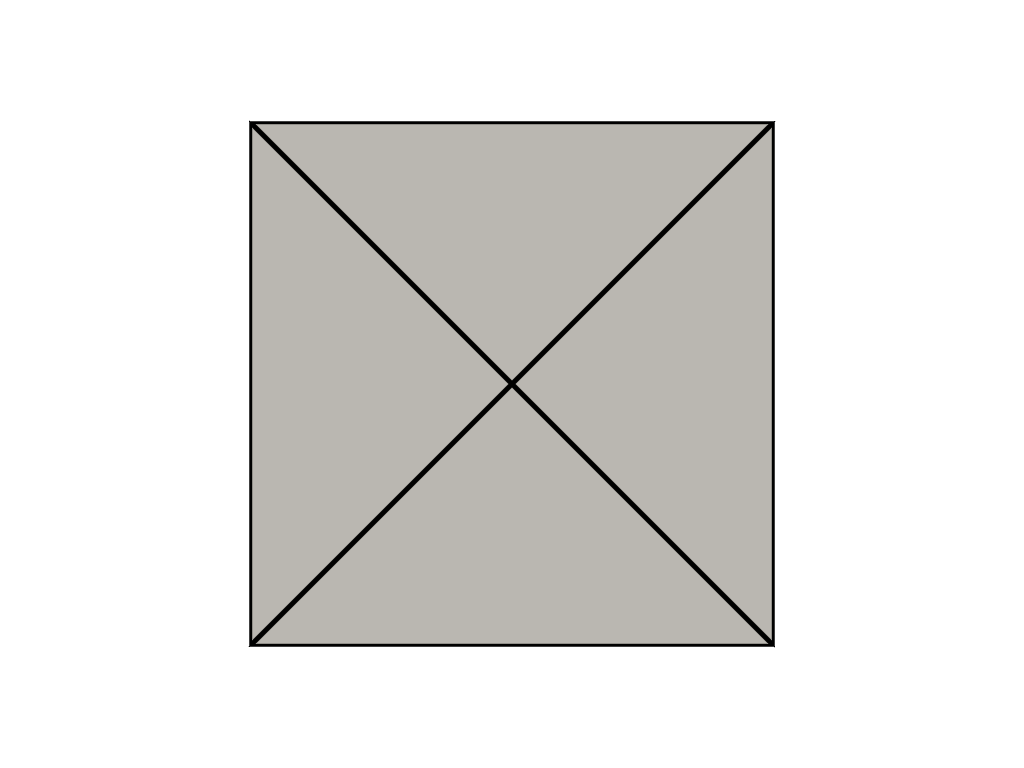

In [17]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                  [1,0,0],
                  [1,1,0],
                  [0,1,0],
                  [0.5,0.5,0]])

cells =  np.array([[3, 0, 1, 4],
                   [3,1,2,4],
                   [3,2,3,4],
                   [3,3,0,4]])  

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [18]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 0.707
The minimum Aspect Ratio of the mesh is 0.707
the maximum Aspect Ratio of the mesh is 0.707


In [19]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

The average Skewness of the mesh is 0.25
The minimum Skewness of the mesh is 0.25
the maximum Skewness of the mesh is 0.25


In [20]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the mesh is', round(max(Orthogonality),3)) 

The average Face Orthogonality of the mesh is 0.894
The minimum Face Orthogonality of the mesh is 0.894
the maximum Face Orthogonality of the mesh is 0.894


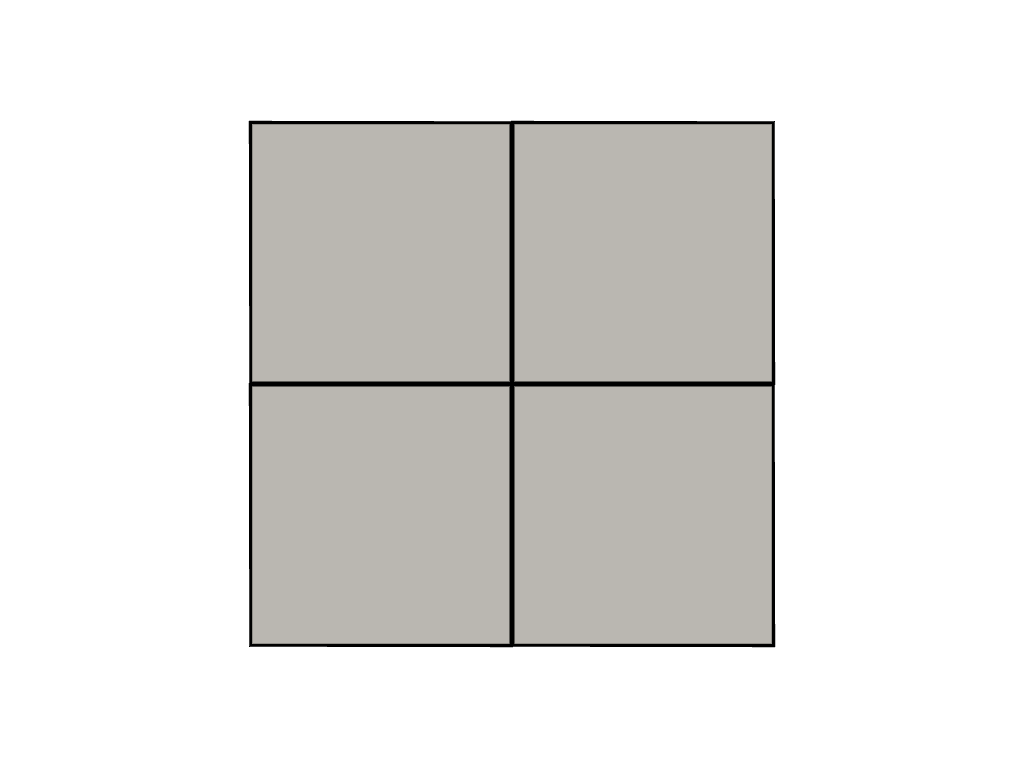

In [21]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                  [1,0,0],
                  [1,1,0],
                  [0,1,0],
                  [0.5,0,0],
                 [1,0.5,0],
                  [0.5,1,0],
                   [0,0.5,0],
                  [0.5,0.5,0]])

cells =  np.array([[4, 0, 4, 8,7],
                   [4,4,1,5,8],
                   [4,8,5,2,6],
                   [4,6,3,7,8]])  

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

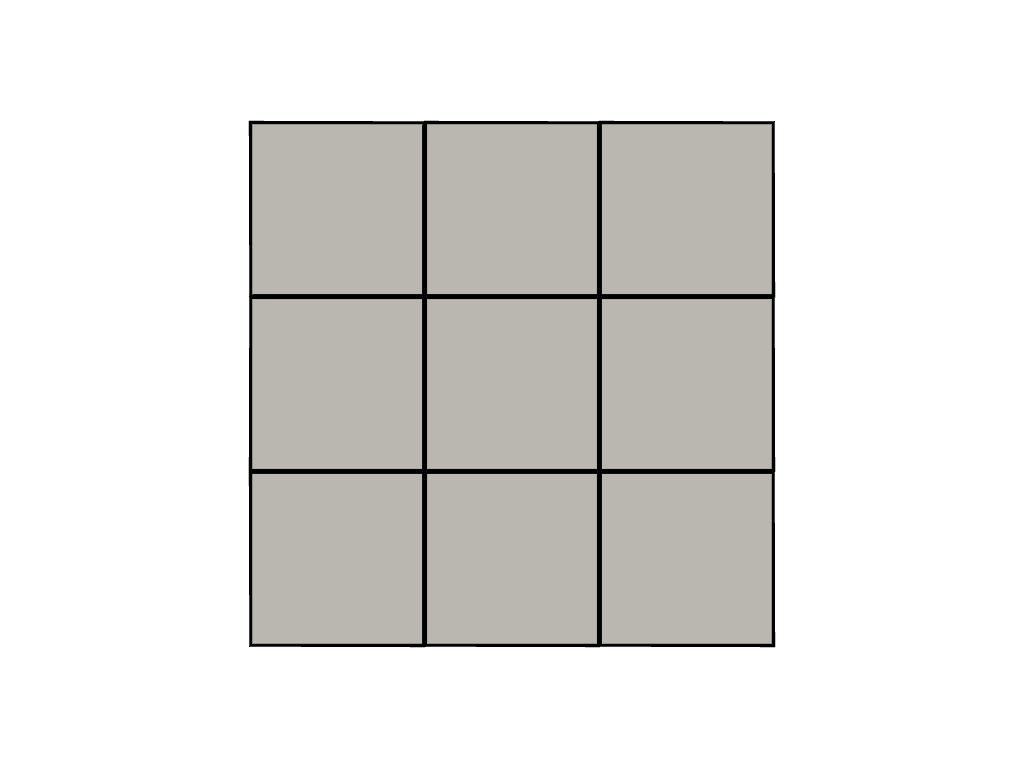

In [22]:
# mesh points
vertices = np.array([[0,0,0],
                     [1,0,0],
                     [1,1,0],
                     [0,1,0],
                     [2,1,0],
                     [2,0,0],
                     [0,2,0],
                     [1,2,0],
                     [2,2,0],
                     [0,3,0],
                     [1,3,0],
                     [2,3,0],
                     [3,0,0],
                     [3,1,0],
                     [3,2,0],
                     [3,3,0],
                     [0.1,0.1,0]])

# mesh faces
faces = np.array([[4, 0,1,2,3],
                  [4, 1,5,4,2],
                  [4, 2,7,6,3],
                  [4, 2,4,8,7],
                  [4, 6,7,10,9],
                  [4, 7,8,11,10],
                  [4, 8,14,15,11],
                  [4, 4, 13,14,8],
                  [4, 5,12,13,4]])  

mesh = pyvista.PolyData(vertices, faces)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [23]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 1.0
The minimum Aspect Ratio of the mesh is 1.0
the maximum Aspect Ratio of the mesh is 1.0


In [24]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

The average Skewness of the mesh is 0.0
The minimum Skewness of the mesh is 0.0
the maximum Skewness of the mesh is 0.0


In [25]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the mesh is', round(max(Orthogonality),3)) 

The average Face Orthogonality of the mesh is 1.0
The minimum Face Orthogonality of the mesh is 1.0
the maximum Face Orthogonality of the mesh is 1.0


C:\Users\20192167\AppData\Local\Temp/ipykernel_24844/843334755.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ort = (dot_e_A)/(magnitude_e*magnitude_A)


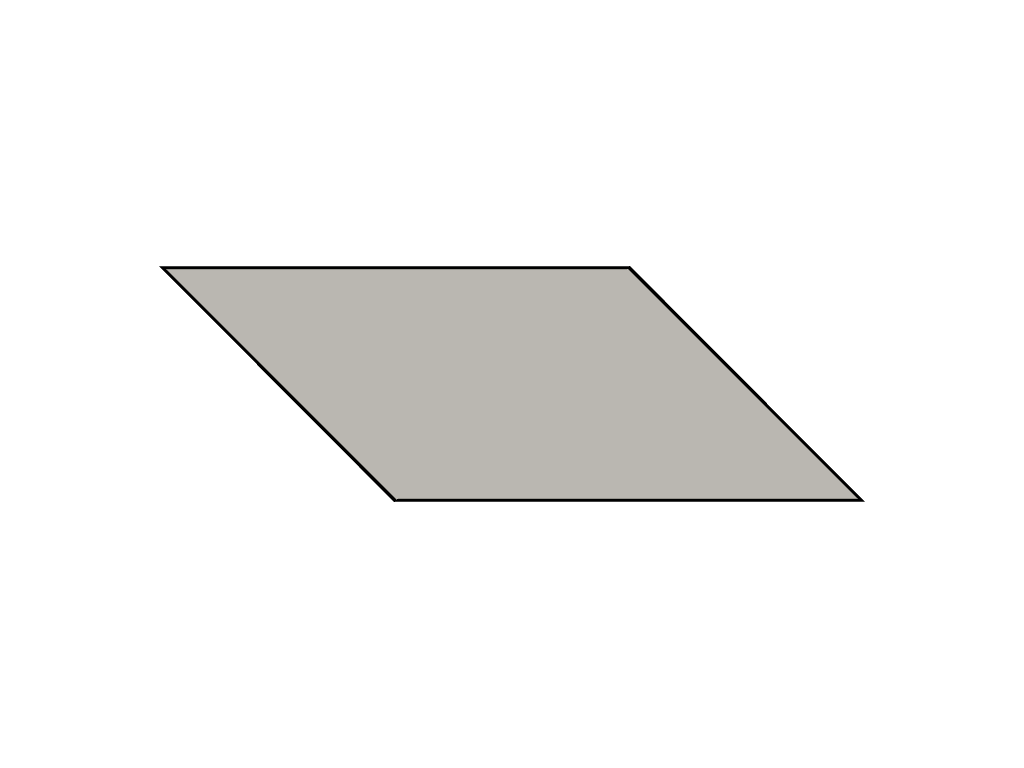

In [26]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [-1,1,0],
                [0.5, 0.5, 0]])

cells =  np.array([[4, 0, 1, 2, 3]])  

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [27]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 0.707
The minimum Aspect Ratio of the mesh is 0.707
the maximum Aspect Ratio of the mesh is 0.707


In [28]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

The average Skewness of the mesh is 0.5
The minimum Skewness of the mesh is 0.5
the maximum Skewness of the mesh is 0.5


In [29]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the mesh is', round(max(Orthogonality),3)) 

The average Face Orthogonality of the mesh is 0.707
The minimum Face Orthogonality of the mesh is 0.707
the maximum Face Orthogonality of the mesh is 0.707


C:\Users\20192167\AppData\Local\Temp/ipykernel_24844/843334755.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ort = (dot_e_A)/(magnitude_e*magnitude_A)


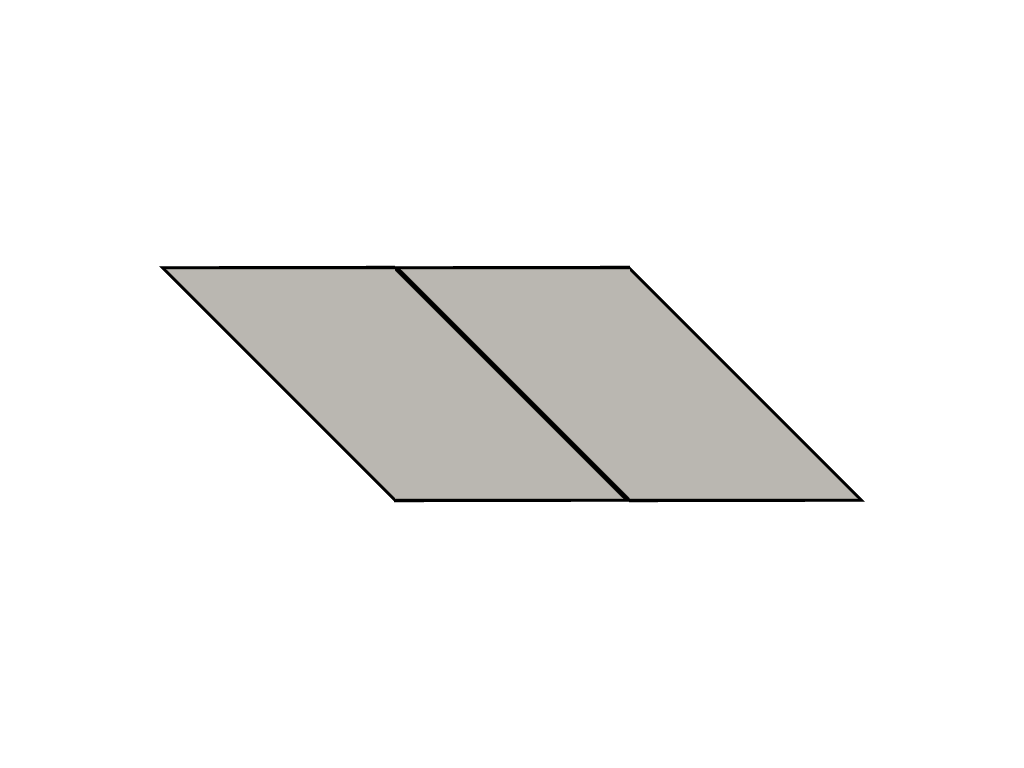

In [30]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [-1,1,0],
                [0.5, 0.5, 0],
                  [1,0,0],
                  [0,1,0]])

cells =  np.array([[4, 0, 5, 6, 3],
                  [4, 5,1,2,6]])  

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [31]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 0.707
The minimum Aspect Ratio of the mesh is 0.707
the maximum Aspect Ratio of the mesh is 0.707


In [32]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

The average Skewness of the mesh is 0.5
The minimum Skewness of the mesh is 0.5
the maximum Skewness of the mesh is 0.5


In [33]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the mesh is', round(max(Orthogonality),3)) 

The average Face Orthogonality of the mesh is 0.707
The minimum Face Orthogonality of the mesh is 0.707
the maximum Face Orthogonality of the mesh is 0.707


C:\Users\20192167\AppData\Local\Temp/ipykernel_24844/843334755.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ort = (dot_e_A)/(magnitude_e*magnitude_A)


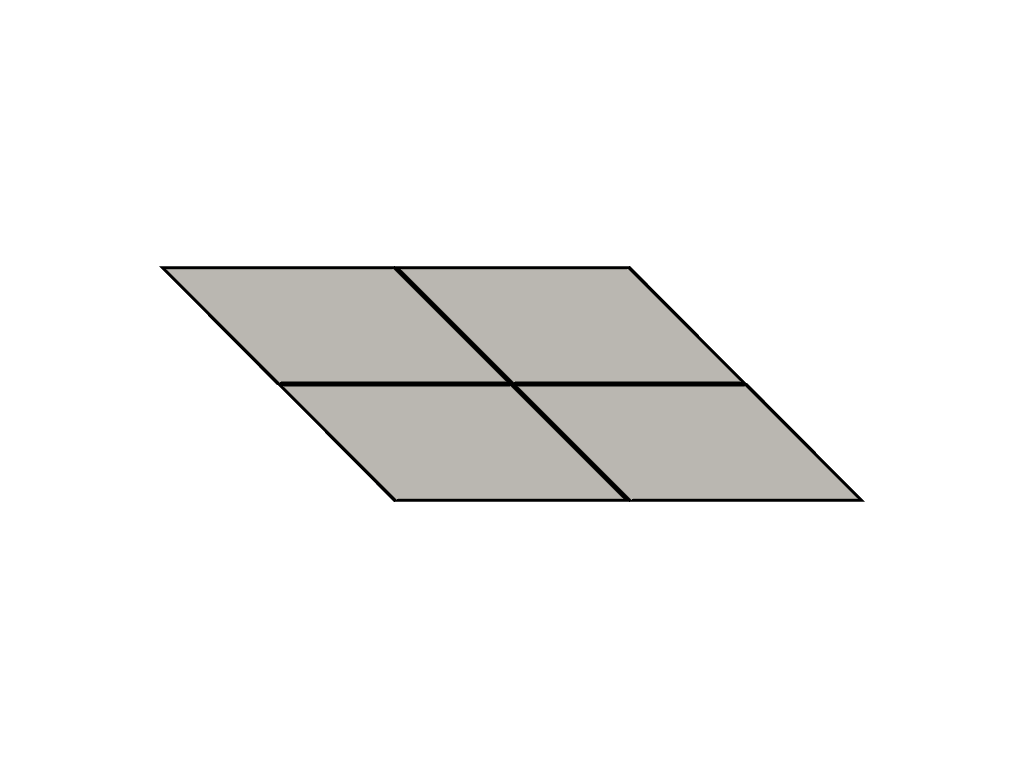

In [34]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [-1,1,0],
                [0.5, 0.5, 0],
                  [1,0,0],
                  [0,1,0],
                  [-0.5,0.5,0],
                  [1.5,0.5,0],
                  [1,0.5,0]])

cells =  np.array([[4, 0, 5, 4, 7],
                  [4, 5,1,8,4],
                  [4, 7,4,6,3],
                  [4, 4,8,2,6]])  

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(10)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [35]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 0.707
The minimum Aspect Ratio of the mesh is 0.707
the maximum Aspect Ratio of the mesh is 0.707


In [36]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

The average Skewness of the mesh is 0.5
The minimum Skewness of the mesh is 0.5
the maximum Skewness of the mesh is 0.5


In [37]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the mesh is', round(max(Orthogonality),3)) 

The average Face Orthogonality of the mesh is 0.707
The minimum Face Orthogonality of the mesh is 0.707
the maximum Face Orthogonality of the mesh is 0.707


C:\Users\20192167\AppData\Local\Temp/ipykernel_24844/843334755.py:108: RuntimeWarning: invalid value encountered in double_scalars
  ort = (dot_e_A)/(magnitude_e*magnitude_A)


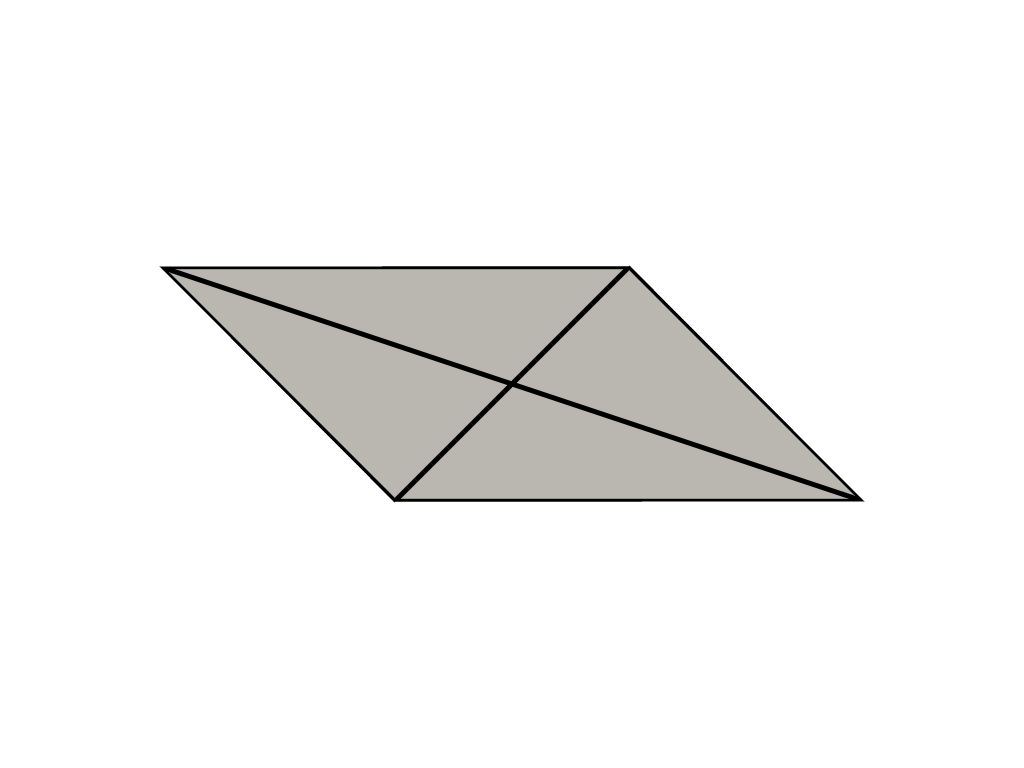

In [38]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [-1,1,0],
                [0.5, 0.5, 0]])

cells =  np.array([[3, 0, 1, 4],
                  [3,1,2,4],
                  [3,2,3,4],
                  [3,3,0,4]])  

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(10)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [39]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 0.4
The minimum Aspect Ratio of the mesh is 0.354
the maximum Aspect Ratio of the mesh is 0.447


In [40]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

The average Skewness of the mesh is 0.625
The minimum Skewness of the mesh is 0.557
the maximum Skewness of the mesh is 0.693


In [41]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the mesh is', round(max(Orthogonality),3)) 

The average Face Orthogonality of the mesh is 0.602
The minimum Face Orthogonality of the mesh is 0.496
the maximum Face Orthogonality of the mesh is 0.707


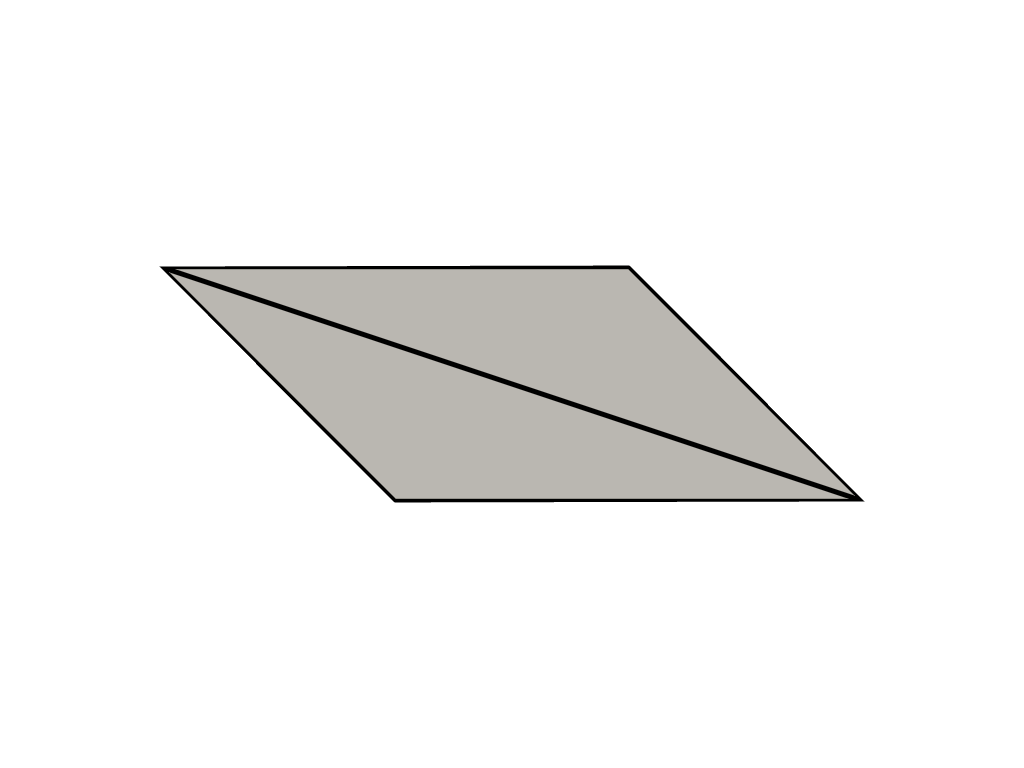

In [42]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [-1,1,0],
                [0.5, 0.5, 0]])

cells =  np.array([[3, 3, 0,1],
                  [3,1,2,3]])  

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(10)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [43]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 0.447
The minimum Aspect Ratio of the mesh is 0.447
the maximum Aspect Ratio of the mesh is 0.447


In [44]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

The average Skewness of the mesh is 0.693
The minimum Skewness of the mesh is 0.693
the maximum Skewness of the mesh is 0.693


In [45]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the mesh is', round(max(Orthogonality),3))

The average Face Orthogonality of the mesh is 0.447
The minimum Face Orthogonality of the mesh is 0.447
the maximum Face Orthogonality of the mesh is 0.447


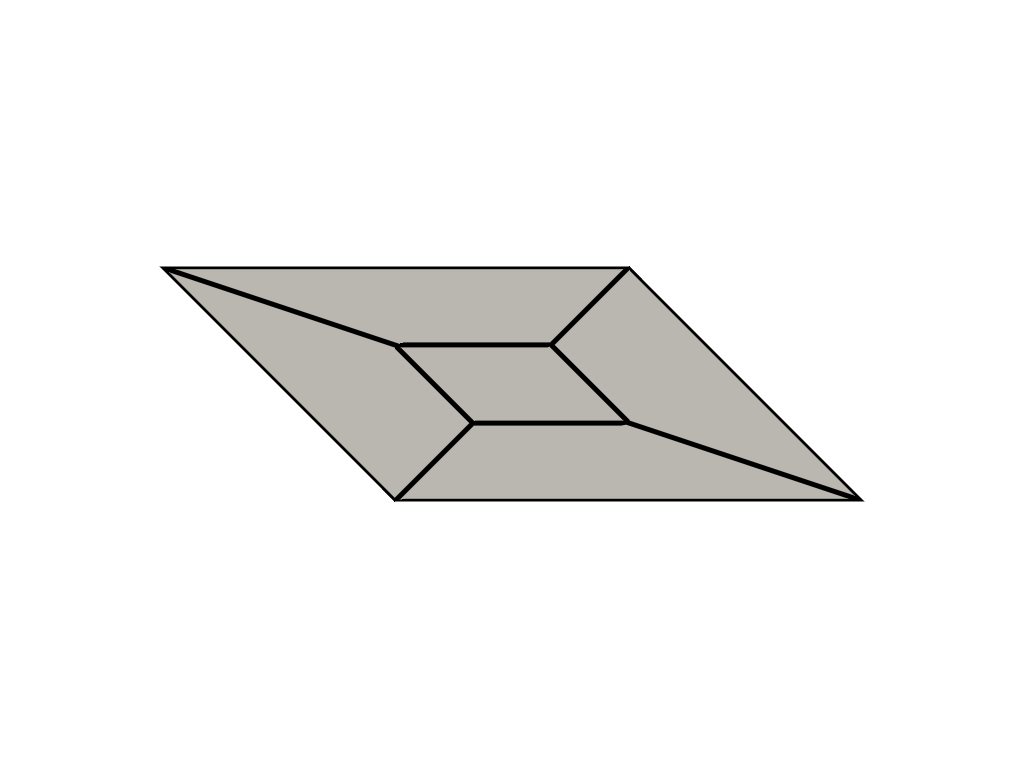

In [46]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [-1,1,0]])

cells =  np.array([[4, 0, 1, 2, 3]])  

point1 = (points[0] + (points[2]+points[0])/3)
point2 = (points[0] + 2*(points[2]+points[0])/3)
point3 = (points[0] + (points[1]+2*points[3])/3)
point4 = (points[0] + ((2*points[1])+points[3])/3)
points = np.vstack([points,point1,point2,point3,point4])

c = 0
d1 = cells[c][1]
d2 = cells[c][2]
d3 = cells[c][3]
d4 = cells[c][4]
g = len(points)

cells[c]= [4, d1,d2,(g-1),(g-4)]
cells = np.vstack([cells, [4, (g-1),d2,d3,(g-3)]])
cells = np.vstack([cells, [4, (g-2),(g-3),d3,d4]])
cells = np.vstack([cells, [4, d1,(g-4),(g-2),d4]])
cells = np.vstack([cells, [4, (g-4),(g-2),(g-3),(g-1)]])

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(10)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [47]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6

q = len(cells) #Total number of cells
p = [] #A temporary array to store the points of the cell of interest
i = 0
aspect_ratio = []
distance = [] #A temporary array containing the lenghts of the edges

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            for x in range(0,z1):
                l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                distance.append(d)
            ar = min(distance)/max(distance)
            aspect_ratio.append(ar)
            i = 0
            p =[]
            distance = []

            
print('The average Aspect Ratio of the mesh is', round(sum(aspect_ratio)/len(aspect_ratio),3))
print('The minimum Aspect Ratio of the mesh is', round(min(aspect_ratio),3))
print('the maximum Aspect Ratio of the mesh is', round(max(aspect_ratio),3))

The average Aspect Ratio of the mesh is 0.369
The minimum Aspect Ratio of the mesh is 0.236
the maximum Aspect Ratio of the mesh is 0.707


In [48]:
import math

if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    qe = 60
    
elif cells[0][0] == 4: #is the mesh is square
    z1 = 4
    z2 = 6
    qe = 90
    z3 = 2
    
q = len(cells) #the total number of cells in the mesh
p = []
i = 0
Skewness = []
distance = []

for y in range(0,q):
    for x in range(1,z2):
        if i < z1:
            a = points[cells[y][x]]
            p.append(a)
            i = i+1
        elif i == z1:
            
            if z1 ==3:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[1]
                b = distance[2]
                c = distance[0]
                alpha = math.degrees(math.acos((a**2-b**2-c**2)/(-2*b*c))) #calculates the angles of the corners
                beta = math.degrees(math.acos((b**2-c**2-a**2)/(-2*c*a)))
                gamma = math.degrees(math.acos((c**2-b**2-a**2)/(-2*b*a)))
                qmin = min(alpha, beta, gamma) #determines the minimal angle
                qmax = max(alpha, beta, gamma) #determines the maximal angle
                
            elif z1 == 4:
                for x in range(0,z1):
                    l = abs(p[x%z1]-p[(x+1)%z1]) # calculates the difference in x and y coordinates of the points
                    d = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d)
                a = distance[0]
                b = distance[1]
                c = distance[2]
                d = distance[3]
                
                for x in range(0,z3):
                    l = abs(p[x%z1]-p[(x+2)%z1]) # calculates the difference in x and y coordinates of the points
                    d2 = math.sqrt(l[0]**2 + l[1]**2) # calculates the length of the edges
                    distance.append(d2)
                    
                e = distance[4]
                f = distance[5]
                alpha1 = math.degrees(math.acos((b**2-e**2-a**2)/(-2*e*a))) #calculates the angles of the corners
                alpha2 = math.degrees(math.acos((d**2-f**2-c**2)/(-2*f*c)))
                beta = math.degrees(math.acos((e**2-a**2-b**2)/(-2*a*b)))
                gamma1 = math.degrees(math.acos((a**2-e**2-b**2)/(-2*e*b)))
                gamma2 = math.degrees(math.acos((c**2-d**2-f**2)/(-2*d*f)))
                gamma = gamma2+alpha2
                alpha = gamma1+alpha1
                delta = math.degrees(math.acos((f**2-d**2-c**2)/(-2*d*c)))
                qmin = min(alpha, beta, gamma, delta) #determines the minimal angle
                qmax = max(alpha, beta, gamma, delta) #determines the maximal angle
            skewness = max((qmax-qe)/(180-qe), (qe-qmin)/qe) 
            Skewness.append(skewness)
            i = 0
            p =[]
            distance = []
            
print('The average Skewness of the mesh is', round(sum(Skewness)/len(Skewness),3))
print('The minimum Skewness of the mesh is', round(min(Skewness),3))
print('the maximum Skewness of the mesh is', round(max(Skewness),3))

ValueError: math domain error

In [ ]:
if cells[0][0] == 3: #If the mesh is triangular
    z1 = 3
    z2 = 5
    
elif cells[0][0] == 4: #If the mesh is square
    z1 = 4
    z2 = 6
    
#----------------------------------------------#
#----Creating a center point in each cell------#
#----------------------------------------------#

len_cells = len(cells) #the total number of cells in the mesh
len_points = len(points)
Orthogonality = []

if z1 ==3: #if triangle
    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
    
        for x in range(1,5):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2])/3
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[d]+points[f])/2) #creating a additional point in the middle of the third edge of the side 
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                vectors_e = [e1[:2],e2[:2],e3[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[d]-points[f]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fd
                vectors_A=[A1,A2,A3]
                
                orth = []
                for o in range(0,3):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

                                        
elif z1==4: #if square

    for y in range(0,len_cells):
        p=[]
        i = 0
        
        d = cells[y][1]
        e = cells[y][2]
        f = cells[y][3]
        g = cells[y][4]
        
        for x in range(1,6):
            if i < z1:
                a = points[cells[y][x]]
                p.append(a)
                i = i+1
            elif i == z1:
                center = (p[0]+p[1]+p[2]+p[3])/4
                point1 = ((points[e]+points[d])/2) #creating a additional point in the middle of the first edge of the side
                point2 = ((points[f]+points[e])/2) #creating a additional point in the middle of the second edge of the side
                point3 = ((points[g]+points[f])/2) #creating a additional point in the middle of the third edge of the side
                point4 = ((points[f]+points[d])/2) #creating a additional point in the middle of the third edge of the side
                
                e1= point1-center #center to point1
                e2= point2-center #center to point2
                e3= point3-center #center to point3
                e4= point4-center #center to point4
                vectors_e = [e1[:2],e2[:2],e3[:2], e4[:2]]
                
                v1= points[e]-points[d]
                v2= points[f]-points[e]
                v3= points[g]-points[f]
                v4= points[d]-points[g]
                
                #v=(a,b) u=(b,-a) #perpendicular
                A1= (v1[1],-v1[0]) #perpendicular to side de
                A2= (v2[1],-v2[0])#perpendicular to side ef
                A3= (v3[1],-v3[0])#perpendicular to side fg
                A4= (v4[1],-v4[0])#perpendicular to side gd
                vectors_A=[A1,A2,A3,A4]
                
                orth = []
                for o in range(0,4):
                    dot_e_A = abs((vectors_A[o][0]*vectors_e[o][0])+(vectors_A[o][1]*vectors_e[o][1]))
                    magnitude_e = math.sqrt((vectors_e[o][0])**2+(vectors_e[o][1])**2)
                    magnitude_A = math.sqrt((vectors_A[o][0])**2+(vectors_A[o][1])**2)
                    ort = (dot_e_A)/(magnitude_e*magnitude_A)
                    orth.append(ort)
                Orthogonality.append(min(orth))

print('The average Face Orthogonality of the mesh is', round(sum(Orthogonality)/len(Orthogonality),3))
print('The minimum Face Orthogonality of the mesh is', round(min(Orthogonality),3))
print('the maximum Face Orthogonality of the mesh is', round(max(Orthogonality),3)) 

In [ ]:
import numpy as np
import pyvista

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [-1,1,0],
                  [4,0,0],
                  [6,0,0],
                  [3,1,0],
                  [5,1,0],
                  [0.05,0.05,0],
                  [1,-1,0],
                  [3,-1,0],
                  [5,-1,0],
                  [7,-1,0],
                  [-2,2,0],
                  [0,2,0],
                  [2,2,0],
                  [4,2,0]])

cells =  np.array([[4, 0, 1, 2, 3],
                  [4, 1,4,6,2],
                  [4, 4,5,7,6],
                  [4, 0,9,10,1],
                  [4,1,10,11,4],
                  [4,4,11,12,5],
                  [4, 3,2,14,13],
                  [4, 2,6,15,14],
                  [4, 6,7,16,15]])  

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(17)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()